In [76]:
from typing import TypedDict , List ,Dict
from langgraph.graph import  StateGraph, START,END

In [77]:
class AgentState(TypedDict):
    number1: int 
    operation1: str
    number2: int
    finalNumber: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int



In [83]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) 

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) 


graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", 
    decide_next_node,
    {
        # Edge: Node format
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)


graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2", 
    decide_next_node1,
    {
        # Edge: Node format
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()


NameError: name 'decide_next_node' is not defined

In [84]:
AgentState = Dict[str, Any] 
graph=StateGraph(AgentState)
graph.add_node("add_node", adder1)
graph.add_node("subtract_node", subtractor1)
graph.add_node("router1", lambda state:state) 

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) 

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1", 
    selector1,
    {
        # Edge: Node format
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)


graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges("router2", selector2,{"addition_operation2": "add_node2","subtraction_operation2": "subtract_node2"})


graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

NameError: name 'Any' is not defined

In [85]:
app=graph.compile()

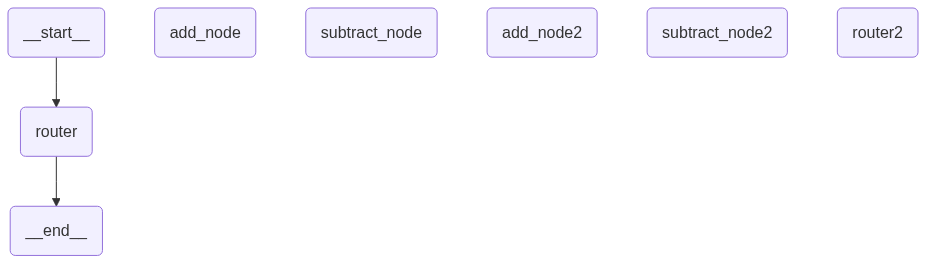

In [86]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [87]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)

In [88]:
print(app.invoke(initial_state))


{'number1': 10, 'operation1': '-', 'number2': 5, 'finalNumber': 0, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 0}
